In [40]:
import os
from benchmarkrewriter.benchmark_parser import BenchmarkParser, WorkerBenchmarkParser, WorkerEncoding
import pandas as pd

In [41]:
results_path = r'C:\Users\huda\Downloads\repetitions\repetitions\\'
result_files = os.listdir(results_path)
benchmark_path = r'C:\Users\huda\Documents\GitHub\scheduling_model_jrc\code\upgrades\benchmarks_with_workers'

In [ ]:
def read_single_benchmark(path, benchmark):
    parser = WorkerBenchmarkParser()
    data = parser.parse_benchmark(path + '/' + benchmark)
    return {'n_operations': data.n_operations(), 'n_machines': data.n_machines(), 'n_workers': data.n_workers()}
def read_benchmarks_workers(path):
    result = dict()
    benchmarks = os.listdir(path)
    for benchmark in benchmarks:
        #parser = BenchmarkParser()
        parser = WorkerBenchmarkParser()
        data = parser.parse_benchmark(path + '/' + benchmark)
        #f, dv = get_flexibility_and_dv(data)


        result[benchmark] = {'n_operations': data.n_operations(), 'n_machines': data.n_machines()}

    return result

In [ ]:
results = dict()
benchmark_data = dict()
for file in result_files:
    file_content = pd.read_csv(results_path + file, names=['name','optimization_status','fitness_value','lower_bound', 'runtime', 'result_vector1', 'result_vector2', 'result_vector3', 'peak_cpu', 'peak_ram', 'resource_history', 'best_result_history'], sep=';')
    df = pd.DataFrame(file_content)
    name = file.split('\\')[-1][8:-4]
    results[name] = dict()
    for index, row in df.iterrows():
        if row['name'].startswith('Error'):
            continue
        if row['name'] not in results[name]:
            results[name][row['name']] = []
        results[name][row['name']].append({
            'fitness': row['fitness_value'],
            'lower_bound': row['lower_bound'],
            'runtime': row['runtime']
        })


In [44]:
import statistics
average_results = dict()
best_results = dict()
max_change = dict()
for solver in results:
    average_results[solver] = dict()
    best_results[solver] = dict()
    max_change[solver] = dict()
    for instance in results[solver]:
        average_results[solver][instance] = dict()
        fitness = [results[solver][instance][i]['fitness'] for i in range(len(results[solver][instance]))]
        lower_bound = [results[solver][instance][i]['lower_bound'] for i in range(len(results[solver][instance]))]
        runtime = [results[solver][instance][i]['runtime'] for i in range(len(results[solver][instance]))]
        best_results[solver][instance] = {
            'fitness': min(fitness),
            'lower_bound': max(lower_bound),
            'runtime': min(runtime)
        }
        max_change[solver][instance] = {
            'fitness': (max(fitness) - min(fitness))/statistics.mean(fitness),
            'lower_bound': (max(lower_bound) - min(lower_bound))/statistics.mean(lower_bound),
            'runtime': (max(runtime) - min(runtime))/statistics.mean(runtime)
        }
        average_results[solver][instance]['fitness'] = (statistics.mean(fitness), statistics.stdev(fitness))
        average_results[solver][instance]['lower_bound'] = (statistics.mean(lower_bound), statistics.stdev(lower_bound))
        average_results[solver][instance]['runtime'] = (statistics.mean(runtime), statistics.stdev(runtime))

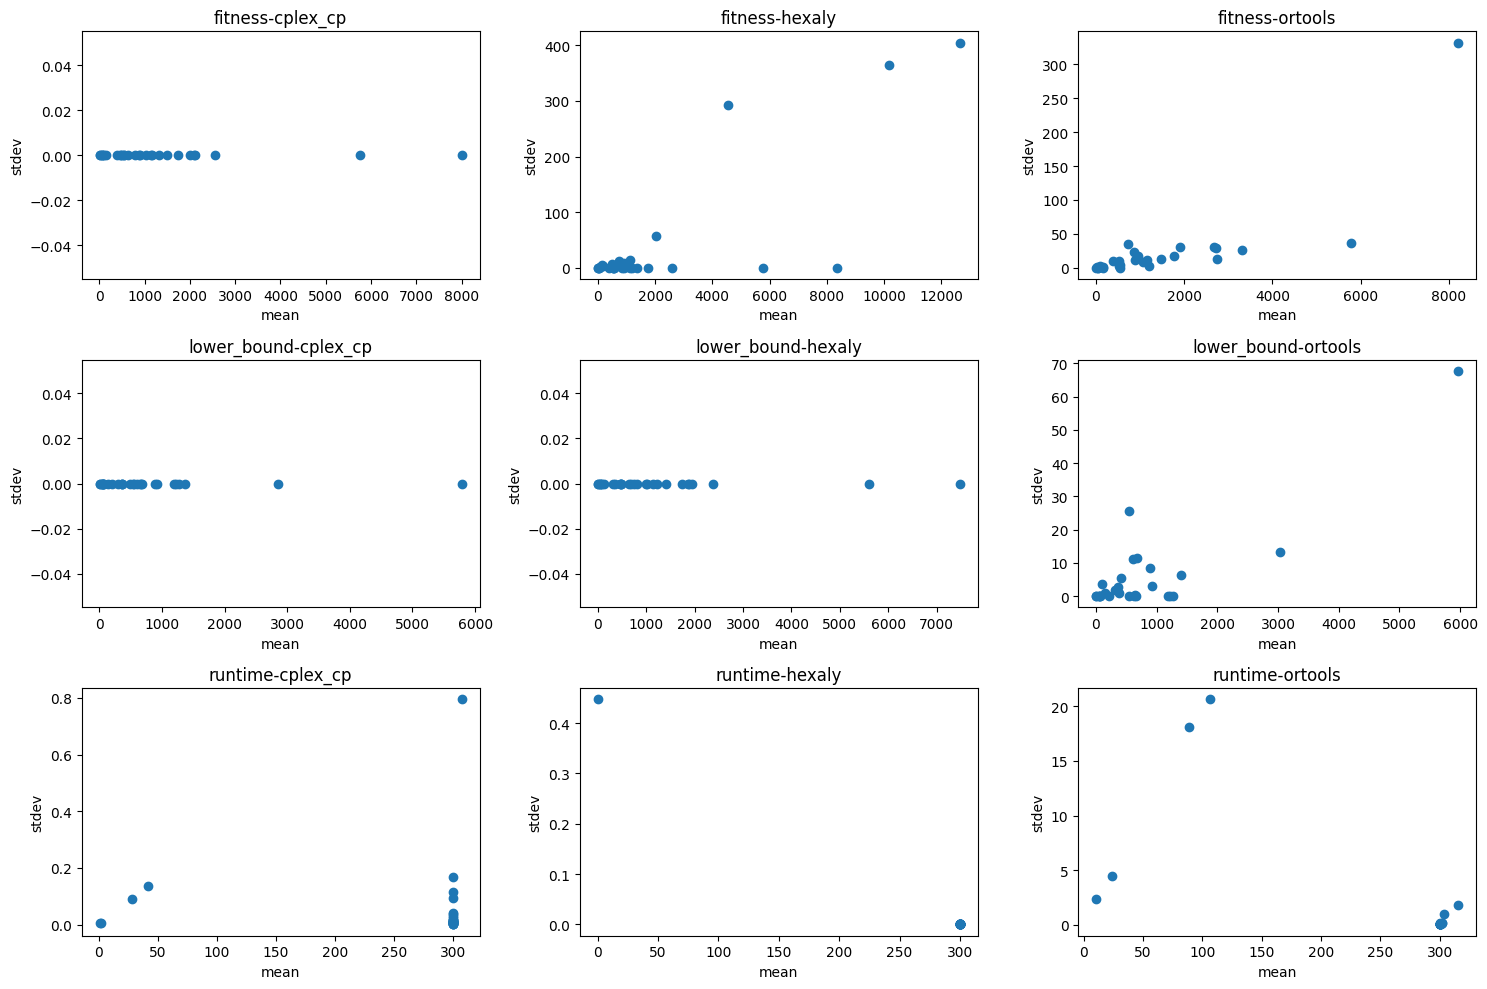

In [45]:
import matplotlib.pyplot as plt
fig = plt.figure(layout='tight', figsize=(15, 10))
axs = fig.subplots(3, len(average_results.keys())-2)
i = 0
for metric in ['fitness', 'lower_bound', 'runtime']:
    j = 0
    for solver in average_results:
        if solver == 'gurobi' or solver == 'cplex_lp':
            continue
        x = []
        y = []
        for instance in average_results[solver]:
            x.append(average_results[solver][instance][metric][0])
            y.append(average_results[solver][instance][metric][1])
        axs[i][j].scatter(x, y, label=solver)
        axs[i][j].set_title(metric + '-' + solver)
        axs[i][j].set_xlabel('mean')
        axs[i][j].set_ylabel('stdev')
        j+=1
    i+=1
plt.show()


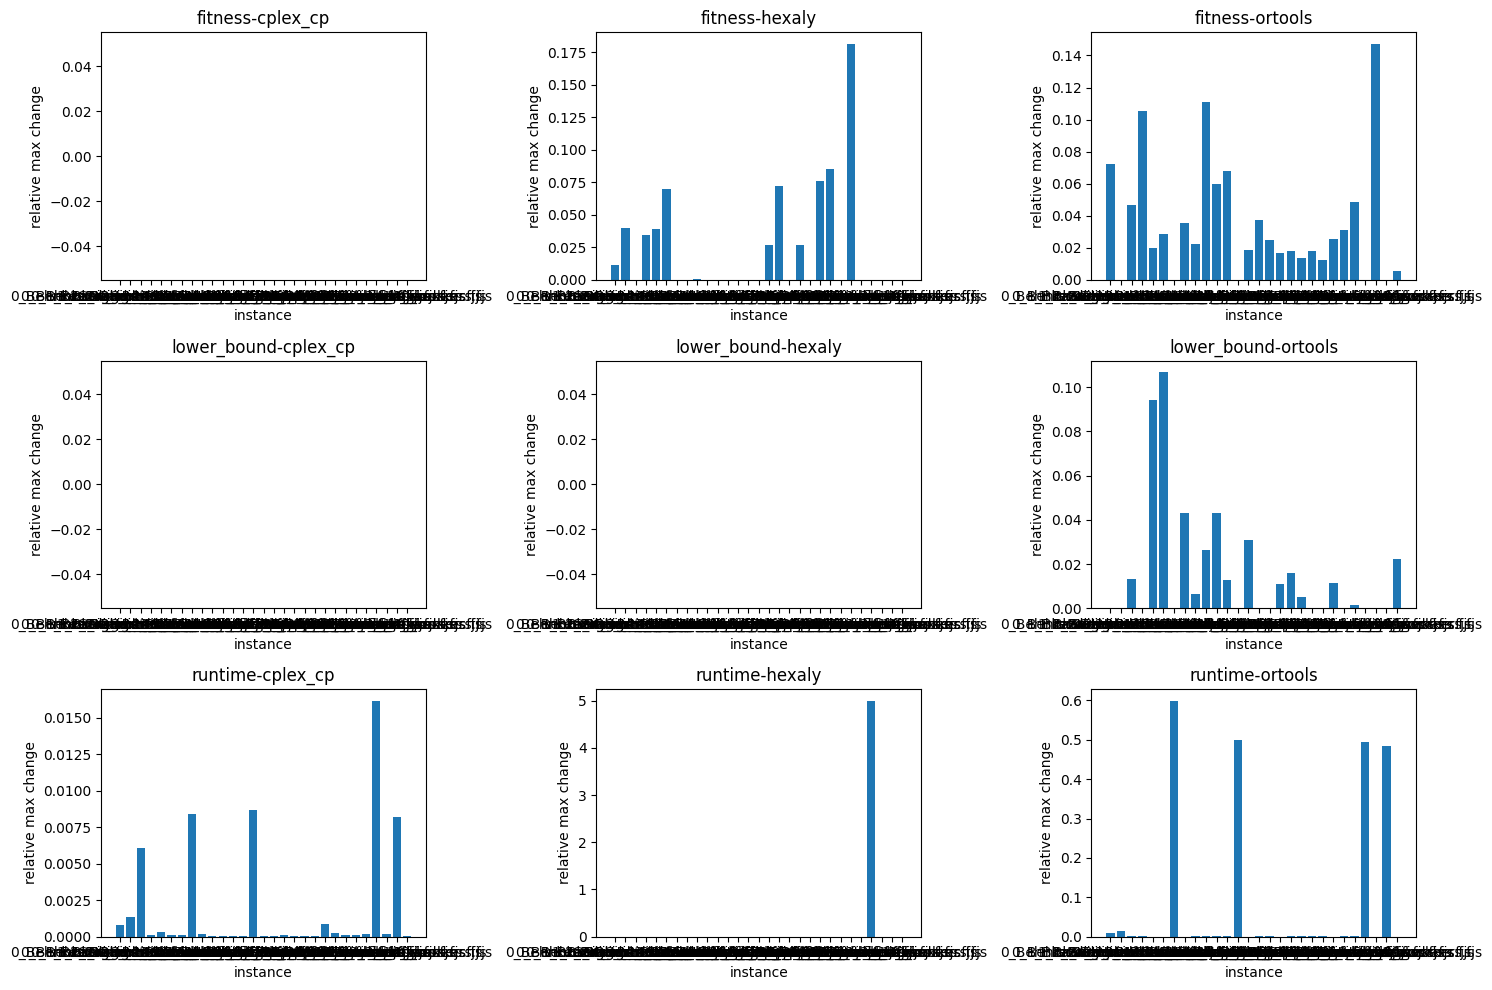

In [46]:
import matplotlib.pyplot as plt
fig = plt.figure(layout='tight', figsize=(15, 10))
axs = fig.subplots(3, len(average_results.keys())-2)
i = 0
for metric in ['fitness', 'lower_bound', 'runtime']:
    j = 0
    for solver in max_change:
        if solver == 'gurobi' or solver == 'cplex_lp':
            continue
        x = []
        y = []
        for instance in max_change[solver]:
            x.append(instance)
            y.append(max_change[solver][instance][metric])
        axs[i][j].bar(x, y, label=solver)
        axs[i][j].set_title(metric + '-' + solver)
        axs[i][j].set_xlabel('instance')
        axs[i][j].set_ylabel('relative max change')
        j+=1
    i+=1
plt.show()
